In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import subprocess


In [13]:
key_order = ['def_80_256_1','def_80_512_1','def_80_1024_1','std_62_2048_1']

rmse = lambda x: (x**2).mean()**0.5


### Timing and precision for bootstrap of zero

In [3]:
!cat boot_number_log.txt | grep '^keys' | tail

# sk_path prec padd lower upper value base_log level, 
# load_time, enc_time, add_time, dec_time, answer


keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 6 7 175956412 99 914822 5420 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 6 8 198279874 125 966501 5371 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 6 9 225688577 128 1139273 5395 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 7 3 74870476 119 487436 5097 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 7 4 98991398 124 583227 5532 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 7 5 125464747 137 734429 5371 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 7 6 146526478 122 769195 5341 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 7 7 173910502 124 866423 5336 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 7 8 200465466 122 1015517 5767 N/A
keys/std_62_2048_1/sk0_LWE.json 6 8 -1 1 0 7 9 220003825 125 1095485 5422 N/A


In [5]:
temp = subprocess.getoutput("cat boot_number_log.txt | grep '^keys'")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "padd", "lower", "upper", "value", "base_log", "level",
                 "load_time", "enc_time", "exc_time", "dec_time", "answer"]) 
df["answer"] = df["answer"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["padd"] = df["padd"].apply(int)
df["prec"] = df["prec"].apply(int)
df["value"] = df["value"].apply(float)
df["base_log"] = df["base_log"].apply(int)
df["level"] = df["level"].apply(int)
df["load_time"] = df["load_time"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["exc_time"] = df["exc_time"].apply(lambda a: np.nan if a=="N/A" else float(a)/1e6)
df["error"] = df["answer"] - df["value"]
df["flag"] = df["answer"].apply(lambda x: np.nan if np.isnan(x) else 1)
df["ind"] = (0*df["prec"] + df["padd"] + df["base_log"])*df["flag"]
df_boot = df #[(df.padd>1)&(df.prec>1)].copy()

print(df_boot.key.unique())

df_boot.head()


['def_80_256_1' 'def_80_512_1' 'def_80_1024_1' 'std_62_2048_1']


,key,prec,padd,lower,upper,value,base_log,level,load_time,enc_time,exc_time,dec_time,answer,error,flag,ind
0,def_80_256_1,1,1,-1,1,0.0,3,3,1404214.0,31,0.008032,5214,NaN,NaN,NaN,NaN
1,def_80_256_1,1,1,-1,1,0.0,3,4,1812334.0,29,0.009622,5151,NaN,NaN,NaN,NaN
2,def_80_256_1,1,1,-1,1,0.0,3,5,2154189.0,28,0.010884,5223,NaN,NaN,NaN,NaN
3,def_80_256_1,1,1,-1,1,0.0,3,6,2557814.0,30,0.012486,4968,NaN,NaN,NaN,NaN
4,def_80_256_1,1,1,-1,1,0.0,3,7,2984433.0,29,0.015776,5264,NaN,NaN,NaN,NaN


In [6]:
# boot: answer mean value

df_boot.pivot_table(values="error", index=["key","prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").round(3).sort_index(axis=1) #.T.loc[key_order]


base_log                     3                                         4  \
level                        4      5      6      7      8      9      3   
key           prec padd                                                    
def_80_1024_1 1    1     0.336 -0.017 -0.021  0.043 -0.008  0.012 -0.078   
                   2       NaN -0.077  0.020 -0.032  0.000 -0.004    NaN   
                   3       NaN  0.020  0.019  0.031 -0.004 -0.008    NaN   
                   4       NaN  0.098  0.028 -0.001  0.004  0.055    NaN   
              2    1    -0.487 -0.031 -0.020  0.031 -0.016 -0.003  0.124   
...                        ...    ...    ...    ...    ...    ...    ...   
std_62_2048_1 6    1       NaN -0.020  0.016  0.002  0.009 -0.011    NaN   
                   2       NaN  0.094  0.019  0.009 -0.009 -0.009    NaN   
                   3       NaN -0.162 -0.008 -0.004 -0.002 -0.006    NaN   
                   4       NaN    NaN -0.027 -0.004 -0.013 -0.004    NaN   
                   5       NaN    NaN -0.021 -0.005  0.009 -0.015    NaN   

base_log                                      ...      6                    7  \
level                        4      5      6  ...      7      8      9      3   
key           prec padd                       ...                               
def_80_1024_1 1    1     0.002  0.011 -0.055  ... -0.020  0.016  0.016 -0.021   
                   2     0.040 -0.032  0.016  ... -0.004 -0.008 -0.027  0.001   
                   3    -0.083  0.006  0.020  ...  0.035  0.031 -0.039  0.014   
                   4    -0.016  0.004 -0.004  ... -0.020  0.016  0.000  0.005   
              2    1     0.005 -0.016 -0.018  ... -0.003 -0.021 -0.031 -0.010   
...                        ...    ...    ...  ...    ...    ...    ...    ...   
std_62_2048_1 6    1    -0.010  0.013 -0.011  ... -0.005  0.010  0.004 -0.002   
                   2    -0.047  0.009 -0.015  ... -0.010 -0.003  0.002 -0.003   
                   3     0.068 -0.012 -0.007  ... -0.001  0.003 -0.002  0.011   
                   4     0.016  0.017  0.012  ... -0.004 -0.014 -0.003 -0.004   
                   5       NaN -0.005 -0.008  ... -0.003 -0.004 -0.011  0.016   

base_log                                                           
level                        4      5      6      7      8      9  
key           prec padd                                            
def_80_1024_1 1    1     0.020  0.012 -0.035  0.023  0.062 -0.020  
                   2    -0.012 -0.008 -0.012  0.004  0.004  0.027  
                   3    -0.062  0.004  0.000 -0.008 -0.016 -0.027  
                   4    -0.066  0.008  0.039 -0.051 -0.020  0.008  
              2    1     0.013 -0.005  0.016  0.029 -0.021 -0.034  
...                        ...    ...    ...    ...    ...    ...  
std_62_2048_1 6    1    -0.014 -0.010  0.002 -0.003 -0.012 -0.003  
                   2    -0.000  0.001 -0.004  0.004  0.005 -0.006  
                   3    -0.003 -0.000 -0.006  0.009 -0.001 -0.001  
                   4     0.001 -0.002  0.003 -0.008  0.007 -0.006  
                   5    -0.003 -0.012 -0.002  0.002  0.016  0.007  

[78 rows x 34 columns]

In [7]:
df_boot[df_boot.key == "def_80_1024_1"].pivot_table(values="error", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").round(3).T

prec                1                           2                           3  \
padd                1      2      3      4      1      2      3      4      1   
base_log level                                                                  
3        4      0.336    NaN    NaN    NaN -0.487    NaN    NaN    NaN -0.049   
         5     -0.017 -0.077  0.020  0.098 -0.031 -0.119  0.099 -0.098  0.013   
         6     -0.021  0.020  0.019  0.028 -0.020 -0.006  0.008 -0.047  0.011   
         7      0.043 -0.032  0.031 -0.001  0.031  0.019 -0.023 -0.017 -0.018   
         8     -0.008  0.000 -0.004  0.004 -0.016 -0.026  0.010  0.013  0.011   
         9      0.012 -0.004 -0.008  0.055 -0.003  0.008  0.003 -0.039 -0.016   
4        3     -0.078    NaN    NaN    NaN  0.124    NaN    NaN    NaN  0.110   
         4      0.002  0.040 -0.083 -0.016  0.005 -0.025  0.017  0.031  0.010   
         5      0.011 -0.032  0.006  0.004 -0.016  0.007 -0.015 -0.006 -0.019   
         6     -0.055  0.016  0.020 -0.004 -0.018  0.005 -0.018  0.013 -0.013   
         7     -0.012  0.023  0.004 -0.008  0.000  0.016 -0.005 -0.018  0.013   
         8      0.047  0.012 -0.031  0.023 -0.005  0.013 -0.013 -0.026 -0.004   
         9      0.004  0.031  0.016 -0.016  0.005 -0.029  0.016  0.010 -0.018   
5        3      0.036  0.040 -0.041 -0.461 -0.014 -0.008 -0.105  0.311  0.015   
         4      0.009  0.020 -0.030 -0.034  0.016  0.006  0.016  0.005  0.003   
         5      0.055 -0.004 -0.024 -0.032 -0.003 -0.005 -0.016  0.013  0.018   
         6      0.027 -0.023  0.023  0.031 -0.026  0.026 -0.003  0.010  0.002   
         7      0.020 -0.055 -0.020 -0.055  0.000 -0.021  0.034 -0.016 -0.009   
         8      0.031  0.004  0.012  0.027 -0.008 -0.016 -0.008 -0.003  0.047   
         9      0.016  0.020  0.012 -0.016 -0.010 -0.010  0.003  0.049 -0.013   
6        3     -0.004  0.025 -0.046  0.007  0.002  0.005 -0.010 -0.047  0.004   
         4     -0.016  0.008  0.008 -0.043 -0.010 -0.016 -0.016  0.003  0.013   
         5      0.066 -0.043 -0.000  0.000  0.029 -0.018  0.005  0.005  0.016   
         6      0.031  0.039 -0.027 -0.012 -0.005  0.008 -0.010 -0.008  0.016   
         7     -0.020 -0.004  0.035 -0.020 -0.003 -0.005  0.034  0.029 -0.016   
         8      0.016 -0.008  0.031  0.016 -0.021 -0.016  0.005  0.005  0.009   
         9      0.016 -0.027 -0.039  0.000 -0.031 -0.005 -0.003  0.010  0.031   
7        3     -0.021  0.001  0.014  0.005 -0.010  0.013  0.036 -0.004  0.002   
         4      0.020 -0.012 -0.062 -0.066  0.013  0.018 -0.021  0.000 -0.009   
         5      0.012 -0.008  0.004  0.008 -0.005 -0.018  0.013  0.005 -0.007   
         6     -0.035 -0.012  0.000  0.039  0.016 -0.013  0.018 -0.031 -0.007   
         7      0.023  0.004 -0.008 -0.051  0.029  0.003  0.013  0.000  0.007   
         8      0.062  0.004 -0.016 -0.020 -0.021 -0.008 -0.003 -0.026 -0.016   
         9     -0.020  0.027 -0.027  0.008 -0.034 -0.026 -0.044  0.044  0.004   

prec                   ...      4             5                           6  \
padd                2  ...      3      4      1      2      3      4      1   
base_log level         ...                                                    
3        4        NaN  ...    NaN    NaN -0.034    NaN    NaN    NaN  0.016   
         5      0.013  ...  0.113  0.067 -0.008  0.047  0.101  0.032 -0.027   
         6     -0.007  ...  0.041  0.018  0.009  0.001  0.002 -0.008 -0.006   
         7     -0.000  ...  0.021 -0.012  0.007  0.002  0.004 -0.004  0.021   
         8     -0.024  ... -0.019  0.002  0.004  0.006 -0.012 -0.016  0.004   
         9     -0.011  ... -0.002 -0.012 -0.020  0.010  0.000 -0.002 -0.020   
4        3        NaN  ...    NaN    NaN  0.017    NaN    NaN    NaN -0.013   
         4     -0.017  ... -0.008  0.020 -0.028  0.014 -0.022 -0.074  0.012   
         5      0.007  ...  0.001  0.017  0.005 -0.005 -0.009 -0.019  0.024   
         6     -0.002  ...  0.002 -0.002 -0.020  0.006

In [8]:
df_boot[df_boot.key == "def_80_256_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


base_log,level


In [9]:
df_boot[df_boot.key == "def_80_512_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1                   2                   3       ...    4  \
padd              1    2    3    4    1    2    3    4    1    2  ...    3   
base_log level                                                    ...        
3        4      4.0  5.0  NaN  NaN  4.0  5.0  NaN  NaN  4.0  5.0  ...  NaN   
         5      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         6      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         7      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         8      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
         9      4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  4.0  5.0  ...  6.0   
4        3      5.0  6.0  NaN  NaN  5.0  6.0  NaN  NaN  5.0  6.0  ...  NaN   
         4      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         5      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         6      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         7      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         8      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
         9      5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  5.0  6.0  ...  7.0   
5        3      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         4      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         5      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         6      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         7      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         8      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
         9      6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  6.0  7.0  ...  NaN   
6        3      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         4      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         5      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         6      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         7      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         8      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   
         9      7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  7.0  NaN  ...  NaN   

prec                   5                   6                 
padd              4    1    2    3    4    1    2    3    4  
base_log level                                               
3        4      NaN  4.0  5.0  NaN  NaN  4.0  5.0  NaN  NaN  
         5      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         6      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         7      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         8      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
         9      7.0  4.0  5.0  6.0  7.0  4.0  5.0  6.0  7.0  
4        3      NaN  5.0  6.0  NaN  NaN  5.0  6.0  NaN  NaN  
         4      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         5      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         6      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         7      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         8      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
         9      NaN  5.0  6.0  7.0  NaN  5.0  6.0  7.0  NaN  
5        3      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         4      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         5      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         6      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         7      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         8      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
         9      NaN  6.0  7.0  NaN  NaN  6.0  7.0  NaN  NaN  
6        3      NaN  7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  
         4      NaN  7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  
         5      NaN  7.0  NaN  NaN  NaN  7.0  NaN  NaN  NaN  
         6      NaN  7.0  NaN  NaN  NaN  7.0  N

In [10]:
df_boot[df_boot.key == "def_80_1024_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1                     2                     3       ...  \
padd              1    2     3     4    1    2     3     4    1    2  ...   
base_log level                                                        ...   
3        4      4.0  NaN   NaN   NaN  4.0  NaN   NaN   NaN  4.0  NaN  ...   
         5      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         6      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         7      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         8      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
         9      4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0  ...   
4        3      5.0  NaN   NaN   NaN  5.0  NaN   NaN   NaN  5.0  NaN  ...   
         4      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         5      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         6      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         7      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         8      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
         9      5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0  ...   
5        3      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         4      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         5      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         6      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         7      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         8      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
         9      6.0  7.0   8.0   9.0  6.0  7.0   8.0   9.0  6.0  7.0  ...   
6        3      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         4      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         5      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         6      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         7      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         8      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
         9      7.0  8.0   9.0  10.0  7.0  8.0   9.0  10.0  7.0  8.0  ...   
7        3      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         4      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         5      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         6      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         7      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         8      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   
         9      8.0  9.0  10.0  11.0  8.0  9.0  10.0  11.0  8.0  9.0  ...   

prec               4          5                     6                   
padd               3     4    1    2     3     4    1    2     3     4  
base_log level                                                          
3        4       NaN   NaN  4.0  NaN   NaN   NaN  4.0  NaN   NaN   NaN  
         5       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         6       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         7       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         8       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
         9       6.0   7.0  4.0  5.0   6.0   7.0  4.0  5.0   6.0   7.0  
4        3       NaN   NaN  5.0  NaN   NaN   NaN  5.0  NaN   NaN   NaN  
         4       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         5       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         6       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         7       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         8       7.0   8.0  5.0  6.0   7.0   8.0  5.0  6.0   7.0   8.0  
         9       7.0   8.0  5.0  6.0   7.0   8.0  5.0  

In [11]:
df_boot[df_boot.key == "std_62_2048_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1                           2                         ...  \
padd              1    2     3     4     5    1    2     3     4     5  ...   
base_log level                                                          ...   
3        5      4.0  5.0   6.0   NaN   NaN  4.0  5.0   6.0   NaN   NaN  ...   
         6      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  ...   
         7      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  ...   
         8      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  ...   
         9      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  ...   
4        4      5.0  6.0   7.0   8.0   NaN  5.0  6.0   7.0   8.0   NaN  ...   
         5      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  ...   
         6      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  ...   
         7      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  ...   
         8      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  ...   
         9      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  ...   
5        3      6.0  7.0   8.0   NaN   NaN  6.0  7.0   8.0   NaN   NaN  ...   
         4      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  10.0  ...   
         5      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  10.0  ...   
         6      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  10.0  ...   
         7      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  10.0  ...   
         8      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  10.0  ...   
         9      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  10.0  ...   
6        3      7.0  8.0   9.0  10.0  11.0  7.0  8.0   9.0  10.0  11.0  ...   
         4      7.0  8.0   9.0  10.0  11.0  7.0  8.0   9.0  10.0  11.0  ...   
         5      7.0  8.0   9.0  10.0  11.0  7.0  8.0   9.0  10.0  11.0  ...   
         6      7.0  8.0   9.0  10.0  11.0  7.0  8.0   9.0  10.0  11.0  ...   
         7      7.0  8.0   9.0  10.0  11.0  7.0  8.0   9.0  10.0  11.0  ...   
         8      7.0  8.0   9.0  10.0  11.0  7.0  8.0   9.0  10.0  11.0  ...   
         9      7.0  8.0   9.0  10.0  11.0  7.0  8.0   9.0  10.0  11.0  ...   
7        3      8.0  9.0  10.0  11.0  12.0  8.0  9.0  10.0  11.0  12.0  ...   
         4      8.0  9.0  10.0  11.0  12.0  8.0  9.0  10.0  11.0  12.0  ...   
         5      8.0  9.0  10.0  11.0  12.0  8.0  9.0  10.0  11.0  12.0  ...   
         6      8.0  9.0  10.0  11.0  12.0  8.0  9.0  10.0  11.0  12.0  ...   
         7      8.0  9.0  10.0  11.0  12.0  8.0  9.0  10.0  11.0  12.0  ...   
         8      8.0  9.0  10.0  11.0  12.0  8.0  9.0  10.0  11.0  12.0  ...   
         9      8.0  9.0  10.0  11.0  12.0  8.0  9.0  10.0  11.0  12.0  ...   

prec              5                           6                         
padd              1    2     3     4     5    1    2     3     4     5  
base_log level                                                          
3        5      4.0  5.0   6.0   NaN   NaN  4.0  5.0   6.0   NaN   NaN  
         6      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  
         7      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  
         8      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  
         9      4.0  5.0   6.0   7.0   8.0  4.0  5.0   6.0   7.0   8.0  
4        4      5.0  6.0   7.0   8.0   NaN  5.0  6.0   7.0   8.0   NaN  
         5      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  
         6      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  
         7      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  
         8      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  
         9      5.0  6.0   7.0   8.0   9.0  5.0  6.0   7.0   8.0   9.0  
5        3      6.0  7.0   8.0   NaN   NaN  6.0  7.0   8.0   NaN   NaN  
         4      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  10.0  
         5      6.0  7.0   8.0   9.0  10.0  6.0  7.0   8.0   9.0  

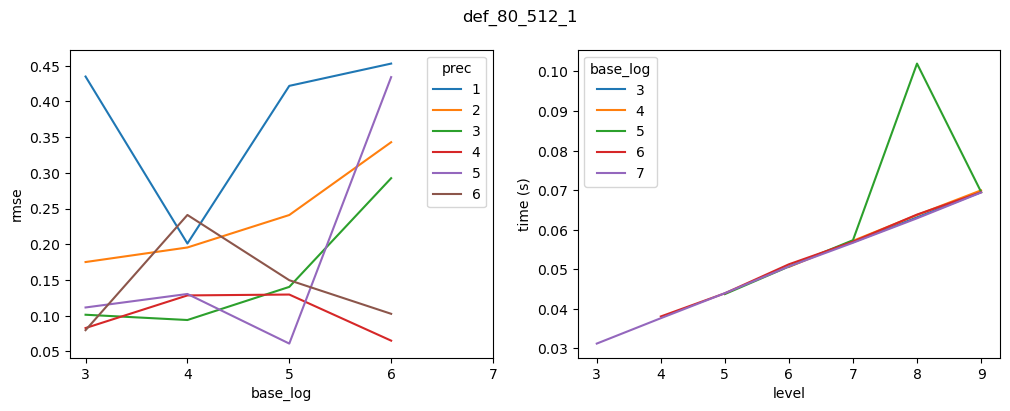

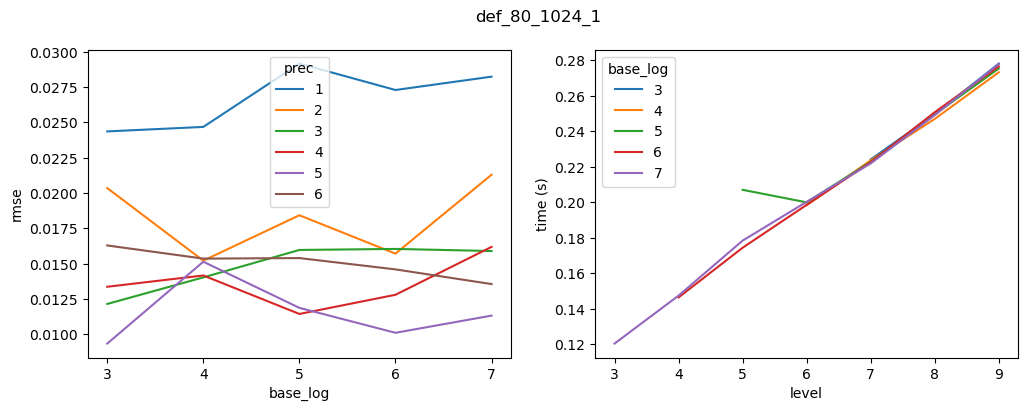

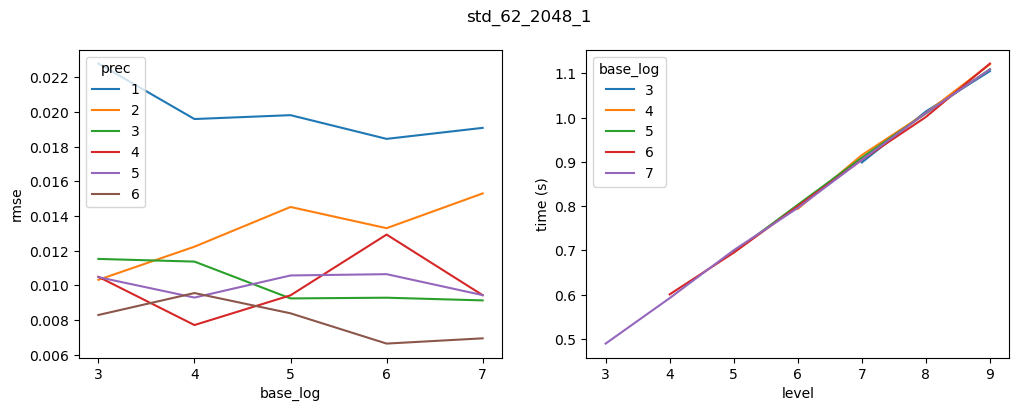

In [14]:
df = df_boot
th = 10

for key in key_order[1:]:
    idx = (df.key == key)&(df.base_log+df.level>=th)
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    df[idx].pivot_table(values="error", index=["prec"], 
        columns=["base_log"], aggfunc=rmse).T.plot(ax=axs[0], xticks=df.base_log.unique())
    axs[0].set_ylabel("rmse")
    df[idx].pivot_table(values="exc_time", index=["level"], 
        columns=["base_log"], aggfunc="mean").plot(ax=axs[1], xticks=df.level.unique())
    axs[1].set_ylabel("time (s)")
    plt.suptitle(key)
    plt.show()


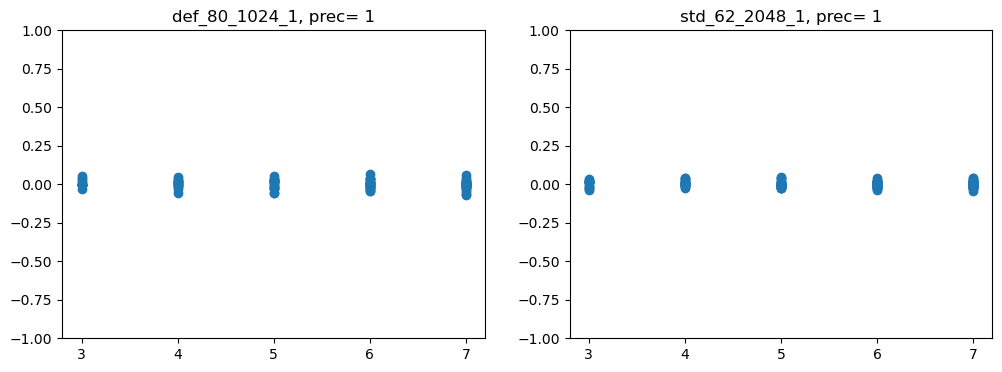

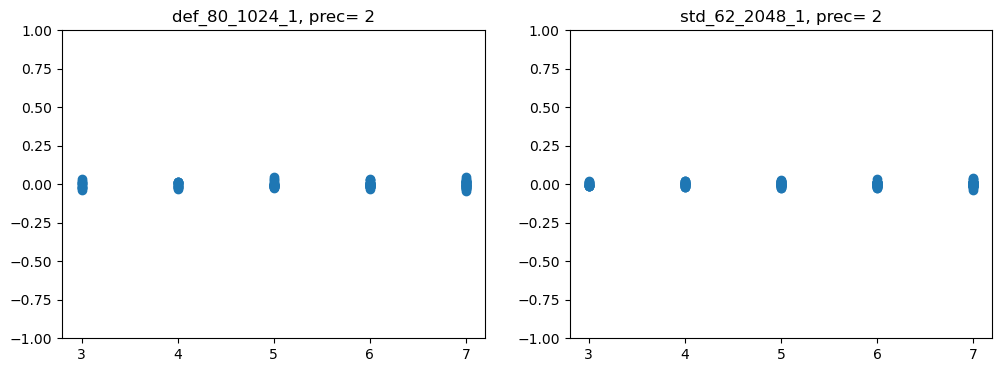

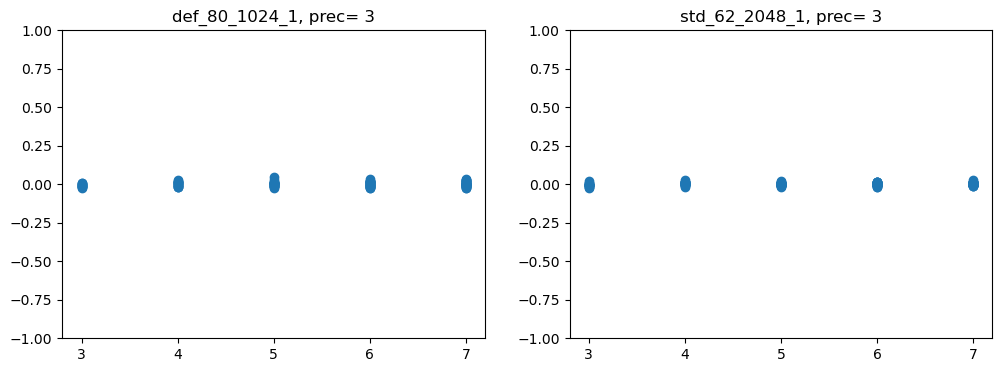

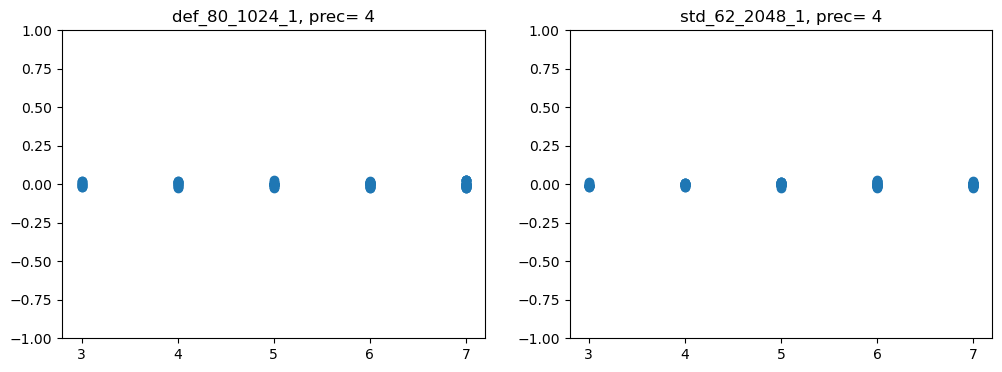

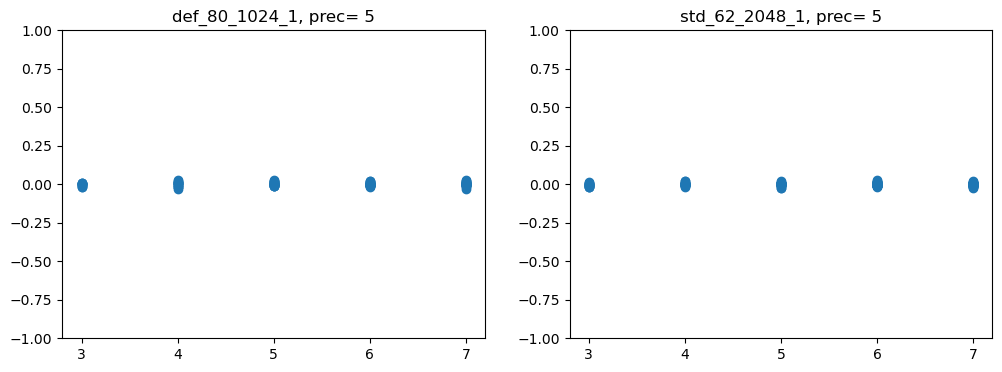

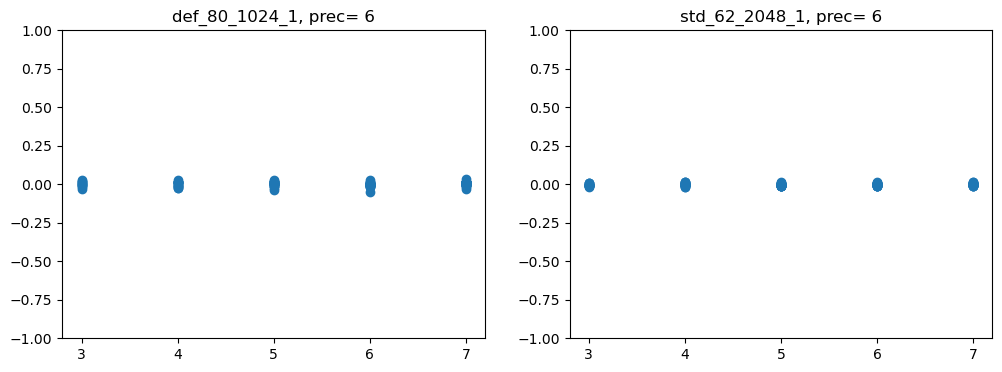

In [15]:
df = df_boot
th = 10

for j in range(1,7):
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    for i, key in enumerate(key_order[2:]):
        idx = (df.key == key)&(df.prec==j)&(df.base_log+df.level>=th)
        axs[i].scatter(df.loc[idx,"base_log"],df.loc[idx,"error"])
        axs[i].set_title(f"{key}, prec= {j}")
        axs[i].set_ylim([-1,1])
        axs[i].set_xticks(df.base_log.unique())
    plt.show()


### Timing and precision for bootstrap of numbers


In [16]:
!cat boot_numbers2_log.txt | grep '^keys' | tail

# sk_path prec padd lower upper value base_log level, 
# load_time, enc_time, add_time, dec_time, answer


cat: boot_numbers2_log.txt: No such file or directory


In [17]:
temp = subprocess.getoutput("cat boot_numbers_1024_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_256_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_512_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_2048a_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat boot_numbers_2048b_log.txt | grep '^keys'")
# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "padd", "lower", "upper", "value", "base_log", "level",
                 "load_time", "enc_time", "exc_time", "dec_time", "answer", "v1", "n1", "s1"]) 
df["answer"] = df["answer"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["padd"] = df["padd"].apply(int)
df["prec"] = df["prec"].apply(int)
df["value"] = df["value"].apply(float)
df["base_log"] = df["base_log"].apply(int)
df["level"] = df["level"].apply(int)
df["load_time"] = df["load_time"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["exc_time"] = df["exc_time"].apply(lambda a: np.nan if a=="N/A" else float(a)/1e6)
df["v1"] = df["v1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["n1"] = df["n1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["s1"] = df["s1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["error"] = df["answer"] - df["value"]
df["flag"] = df["answer"].apply(lambda x: np.nan if np.isnan(x) else 1)
df["ind"] = (0*df["prec"] + df["padd"] + df["base_log"])*df["flag"]

df_boot2 = df #[(df.padd>1)&(df.prec>1)].copy()

print(df_boot2.key.unique())

df_boot2.head()


['def_80_1024_1' 'def_80_256_1' 'def_80_512_1' 'std_62_2048_1']


,key,prec,padd,lower,upper,value,base_log,level,load_time,enc_time,exc_time,dec_time,answer,v1,n1,s1,error,flag,ind
0,def_80_1024_1,1,1,-1,1,-1.0,3,3,12411264.0,59,0.151126,5832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,def_80_1024_1,1,1,-1,1,-1.0,3,4,16539347.0,78,0.178732,3,-0.929688,0.002609,62.0,2.0,0.070312,1.0,4.0
2,def_80_1024_1,1,1,-1,1,-0.8,3,4,NaN,49,0.181997,5,-0.853516,0.002609,62.0,2.0,-0.053516,1.0,4.0
3,def_80_1024_1,1,1,-1,1,-0.6,3,4,NaN,83,0.182302,4,-0.437500,0.002609,62.0,2.0,0.162500,1.0,4.0
4,def_80_1024_1,1,1,-1,1,-0.4,3,4,NaN,50,0.177786,2,-0.126953,0.002609,62.0,2.0,0.273047,1.0,4.0


In [18]:
df_boot2[df_boot2.key == "def_80_1024_1"].pivot_table(values="ind", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec              1                                             2       ...  \
padd              1    2     3     4     5     6     7     8    1    2  ...   
base_log level                                                          ...   
3        4      4.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  4.0  NaN  ...   
         5      4.0  5.0   6.0   7.0   NaN   NaN   NaN   NaN  4.0  5.0  ...   
         6      4.0  5.0   6.0   7.0   8.0   9.0  10.0   NaN  4.0  5.0  ...   
         7      4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  4.0  5.0  ...   
         8      4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  4.0  5.0  ...   
         9      4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  4.0  5.0  ...   
4        3      5.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  5.0  NaN  ...   
         4      5.0  6.0   7.0   8.0   9.0   NaN   NaN   NaN  5.0  6.0  ...   
         5      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         6      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         7      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         8      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
         9      5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  5.0  6.0  ...   
5        3      6.0  7.0   8.0   9.0   NaN   NaN   NaN   NaN  6.0  7.0  ...   
         4      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         5      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         6      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         7      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         8      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
         9      6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0  6.0  7.0  ...   
6        3      7.0  8.0   9.0  10.0  11.0  12.0  13.0   NaN  7.0  8.0  ...   
         4      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         5      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         6      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         7      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         8      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
         9      7.0  8.0   9.0  10.0  11.0  12.0  13.0  14.0  7.0  8.0  ...   
7        3      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         4      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         5      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         6      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         7      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         8      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   
         9      8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  8.0  9.0  ...   

prec               5          6                                           
padd               7     8    1    2     3     4     5     6     7     8  
base_log level                                                            
3        4       NaN   NaN  4.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         5       NaN   NaN  4.0  5.0   6.0   7.0   NaN   NaN   NaN   NaN  
         6      10.0   NaN  4.0  5.0   6.0   7.0   8.0   9.0  10.0   NaN  
         7      10.0  11.0  4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  
         8      10.0  11.0  4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  
         9      10.0  11.0  4.0  5.0   6.0   7.0   8.0   9.0  10.0  11.0  
4        3       NaN   NaN  5.0  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         4       NaN   NaN  5.0  6.0   7.0   8.0   9.0   NaN   NaN   NaN  
         5      11.0  12.0  5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  
         6      11.0  12.0  5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  
         7      11.0  12.0  5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  
         8      11.0  12.0

In [19]:
rmse = lambda x: (x**2).mean()**0.5

df_boot2[df_boot2.key == "def_80_1024_1"].pivot_table(values="error", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc=rmse).T


prec                   1                                                    \
padd                   1         2         3         4         5         6   
base_log level                                                               
3        4      0.272068       NaN       NaN       NaN       NaN       NaN   
         5      0.044013  0.071766  0.134237  0.254966       NaN       NaN   
         6      0.026155  0.024506  0.030735  0.039058  0.077806  0.131807   
         7      0.024528  0.023511  0.025649  0.021873  0.025701  0.028126   
         8      0.024873  0.022781  0.024833  0.021516  0.023448  0.021867   
         9      0.025679  0.026316  0.024445  0.022488  0.024446  0.024705   
4        3      0.261151       NaN       NaN       NaN       NaN       NaN   
         4      0.032258  0.042798  0.065443  0.129000  0.255906       NaN   
         5      0.023387  0.023438  0.024127  0.025818  0.028355  0.035145   
         6      0.023130  0.024548  0.024743  0.024323  0.026837  0.024117   
         7      0.023071  0.023208  0.025829  0.022437  0.025352  0.026044   
         8      0.027879  0.023718  0.022986  0.023375  0.022909  0.027130   
         9      0.026979  0.024571  0.025508  0.023976  0.021759  0.025651   
5        3      0.043128  0.071287  0.143311  0.291628       NaN       NaN   
         4      0.025536  0.024850  0.023425  0.027910  0.027922  0.041013   
         5      0.022595  0.022291  0.023492  0.026879  0.023978  0.022360   
         6      0.024125  0.022309  0.025974  0.023051  0.026678  0.026572   
         7      0.026371  0.025383  0.023200  0.023871  0.022490  0.025642   
         8      0.024692  0.024364  0.020745  0.027971  0.025744  0.022948   
         9      0.025173  0.025914  0.026074  0.024330  0.023560  0.025857   
6        3      0.025967  0.025766  0.030251  0.040129  0.069351  0.127215   
         4      0.024224  0.024692  0.025521  0.023288  0.021581  0.025336   
         5      0.024558  0.024878  0.026476  0.023575  0.025351  0.021858   
         6      0.021766  0.024923  0.024131  0.025425  0.030969  0.025705   
         7      0.025318  0.022646  0.025202  0.026895  0.024869  0.023691   
         8      0.021759  0.023927  0.024423  0.022663  0.025909  0.025174   
         9      0.023760  0.025023  0.025335  0.025266  0.023994  0.018655   
7        3      0.021990  0.023774  0.021978  0.024874  0.025202  0.031175   
         4      0.023943  0.024771  0.022820  0.025192  0.025423  0.024243   
         5      0.021880  0.021616  0.021847  0.020414  0.024783  0.024900   
         6      0.025265  0.022882  0.022531  0.024860  0.023226  0.024339   
         7      0.021721  0.028818  0.023928  0.024349  0.020554  0.022691   
         8      0.023754  0.025563  0.021632  0.029691  0.021846  0.023540   
         9      0.023439  0.024509  0.024315  0.022079  0.020593  0.025102   

prec                                       2            ...         5  \
padd                   7         8         1         2  ...         7   
base_log level                                          ...             
3        4           NaN       NaN  0.607197       NaN  ...       NaN   
         5           NaN       NaN  0.031236  0.051852  ...       NaN   
         6      0.283878       NaN  0.017510  0.016869  ...  0.936458   
         7      0.047159  0.081221  0.016287  0.016047  ...  0.427198   
         8      0.022295  0.028350  0.015965  0.016342  ...  0.191925   
         9      0.025540  0.024639  0.015763  0.015629  ...  0.330903   
4        3           NaN       NaN  0.430381       NaN  ...       NaN   
         4           NaN       NaN  0.021663  0.027422  ...       NaN   
         5      0.074442  0.137696  0.015829  0.015075  ...  0.573365   
         6      0.025718  0.026217  0.015821  0.014955  ...  0.192015   
         7      0.024922  0.025704  0.015652  0.015986  ...  0.330872   
         8      0.023976  0.026264  0.018267  0.015448  ...  0.022852   
         9      0.

In [20]:
rmse = lambda x: (x**2).mean()**0.5

df_boot2[df_boot2.key == "std_62_2048_1"].pivot_table(values="error", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc=rmse).T


prec                   1                                                    \
padd                   1         2         3         4         5         6   
base_log level                                                               
3        5      0.062479  0.139342  0.252554       NaN       NaN       NaN   
         6      0.020428  0.022641  0.047852  0.063789  0.136259  0.277843   
         7      0.019711  0.015198  0.017693  0.022874  0.024301  0.042747   
         8      0.016823  0.018199  0.017963  0.018166  0.018343  0.021049   
         9      0.016664  0.017917  0.015975  0.017632  0.017872  0.017208   
4        4      0.040345  0.068064  0.143816  0.249523       NaN       NaN   
         5      0.019507  0.017541  0.018042  0.026288  0.039910  0.067144   
         6      0.017897  0.017854  0.017016  0.016191  0.020335  0.017817   
         7      0.016457  0.016435  0.018742  0.018128  0.017666  0.014973   
         8      0.016941  0.017555  0.017329  0.018836  0.015976  0.016482   
         9      0.017367  0.015140  0.013789  0.018341  0.016417  0.016760   
5        3      0.070443  0.130220  0.251400       NaN       NaN       NaN   
         4      0.016281  0.017678  0.017353  0.024374  0.038415  0.074083   
         5      0.017105  0.017011  0.018367  0.016593  0.015793  0.017329   
         6      0.015835  0.017930  0.017500  0.017541  0.015426  0.016982   
         7      0.016491  0.015772  0.018329  0.018863  0.018546  0.014411   
         8      0.015135  0.016700  0.016993  0.016709  0.015774  0.015363   
         9      0.017343  0.015395  0.017955  0.016070  0.016748  0.017618   
6        3      0.018813  0.022170  0.034563  0.072391  0.135454  0.226704   
         4      0.015532  0.018445  0.018938  0.018417  0.018747  0.015478   
         5      0.018663  0.017531  0.016921  0.015955  0.016110  0.017459   
         6      0.016890  0.018010  0.018140  0.017221  0.017936  0.017112   
         7      0.015689  0.018406  0.018796  0.019024  0.018832  0.015565   
         8      0.016258  0.017602  0.017706  0.017211  0.016246  0.016414   
         9      0.016866  0.015303  0.016915  0.017248  0.018374  0.016723   
7        3      0.016217  0.016789  0.015573  0.018097  0.026487  0.038793   
         4      0.016562  0.018060  0.015466  0.018621  0.017037  0.016533   
         5      0.019228  0.018537  0.019945  0.017305  0.016479  0.015652   
         6      0.017979  0.019435  0.015690  0.017044  0.017737  0.016226   
         7      0.016912  0.015092  0.016592  0.015001  0.016922  0.018062   
         8      0.019669  0.016945  0.017874  0.017066  0.017045  0.018656   
         9      0.018694  0.016360  0.017348  0.018603  0.015878  0.017502   

prec                                       2            ...         5  \
padd                   7         8         1         2  ...         6   
base_log level                                          ...             
3        5           NaN       NaN  0.045070  0.099949  ...       NaN   
         6           NaN       NaN  0.013808  0.015556  ...  0.911219   
         7      0.074600  0.130255  0.012472  0.011452  ...  0.505074   
         8      0.018152  0.023137  0.010703  0.010876  ...  0.008527   
         9      0.018971  0.016334  0.012550  0.010966  ...  0.008756   
4        4           NaN       NaN  0.027877  0.048901  ...       NaN   
         5      0.141813  0.255993  0.011717  0.010737  ...  0.604095   
         6      0.017083  0.025250  0.012192  0.011224  ...  0.008961   
         7      0.016405  0.018018  0.011990  0.011450  ...  0.008506   
         8      0.014207  0.018050  0.011039  0.010565  ...  0.008945   
         9      0.017702  0.017821  0.011801  0.010738  ...  0.009161   
5        3           NaN       NaN  0.044580  0.068133  ...       NaN   
         4      0.144201  0.266398  0.013663  0.012030  ...  0.603518   
         5      0.017619  0.018796  0.010612  0.011434  ...  0.007936   
         6      0.014267  0.

In [21]:
df_boot2[df_boot2.key == "std_62_2048_1"].pivot_table(values="exc_time", index=["prec","padd"], 
    columns=["base_log","level"], aggfunc="mean").T


prec                   1                                                    \
padd                   1         2         3         4         5         6   
base_log level                                                               
3        3      0.576350  0.485105  0.598623  0.531748  0.610063  0.494688   
         4      0.745057  0.596456  0.703446  0.590401  0.707138  0.598246   
         5      0.849987  0.687297  0.861590  0.687125  0.830417  0.759338   
         6      0.972760  0.806083  0.963209  0.813638  0.988934  0.788845   
         7      1.125350  0.936713  1.108265  0.914704  1.095071  0.891428   
         8      1.219474  0.988959  1.238103  1.013910  1.231199  1.049119   
         9      1.398156  1.111925  1.347956  1.144142  1.372417  1.088610   
4        3      0.599162  0.472530  0.642340  0.511671  0.595488  0.526258   
         4      0.723050  0.589935  0.719578  0.596282  0.706945  0.609066   
         5      0.847946  0.686378  0.853365  0.709464  0.862082  0.700401   
         6      0.968616  0.782608  0.981059  0.780065  0.976552  0.806933   
         7      1.117723  0.887402  1.106951  0.897077  1.101696  0.895774   
         8      1.247016  1.008591  1.229149  0.999538  1.235103  0.982131   
         9      1.342175  1.103647  1.367910  1.114111  1.377413  1.104159   
5        3      0.612764  0.515056  0.595132  0.464538  0.572023  0.500980   
         4      0.731391  0.598190  0.712619  0.600106  0.740221  0.593756   
         5      0.861914  0.694606  0.849325  0.688399  0.847139  0.703319   
         6      0.979134  0.813937  0.965665  0.820456  0.973124  0.798224   
         7      1.113749  0.905984  1.109107  0.906996  1.101002  0.907380   
         8      1.226299  0.993411  1.223127  0.985732  1.231301  1.018898   
         9      1.353562  1.119524  1.341826  1.118237  1.344547  1.088745   
6        3      0.601866  0.490963  0.603872  0.500408  0.604452  0.494559   
         4      0.719364  0.593220  0.719654  0.589680  0.713511  0.585418   
         5      0.848264  0.684171  0.842145  0.704965  0.857457  0.713286   
         6      0.991113  0.806134  0.973950  0.791115  0.963090  0.810002   
         7      1.097531  0.912828  1.100182  0.907320  1.092319  0.902240   
         8      1.233201  0.976011  1.237401  0.993237  1.242789  1.003418   
         9      1.374123  1.132681  1.337373  1.118552  1.362870  1.121589   
7        3      0.594580  0.517435  0.602319  0.490738  0.598674  0.501868   
         4      0.722063  0.627736  0.720200  0.603180  0.722980  0.601350   
         5      0.861384  0.700660  0.863545  0.708737  0.857016  0.705097   
         6      0.982354  0.806207  0.976408  0.814904  0.981160  0.807446   
         7      1.114189  0.963304  1.106135  0.895692  1.104036  0.885592   
         8      1.228155  1.012659  1.225274  0.990720  1.228957  1.016129   
         9      1.372041  1.096987  1.357900  1.110788  1.356026  1.099136   

prec                                       2            ...         5  \
padd                   7         8         1         2  ...         6   
base_log level                                          ...             
3        3      0.613144  0.489109  0.609267  0.501749  ...  0.528842   
         4      0.761662  0.599577  0.709990  0.608573  ...  0.624466   
         5      0.843696  0.672324  0.850998  0.700522  ...  0.703905   
         6      0.965393  0.740259  0.975406  0.794874  ...  0.785174   
         7      1.111865  0.906652  1.129329  0.918086  ...  0.896564   
         8      1.231835  0.998386  1.218649  0.997419  ...  1.002960   
         9      1.350691  1.109847  1.365058  1.117952  ...  1.078963   
4        3      0.596675  0.481819  0.591223  0.483410  ...  0.524963   
         4      0.715972  0.621920  0.716672  0.598538  ...  0.605880   
         5      0.849964  0.700384  0.837232  0.699237  ...  0.692149   
         6      0.966622  0.816779  0.971831  0.805214  ...  0.815439   
         7   

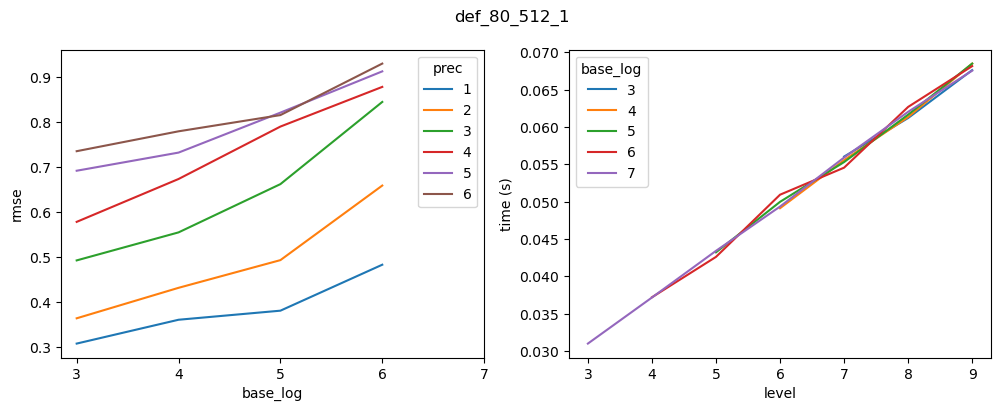

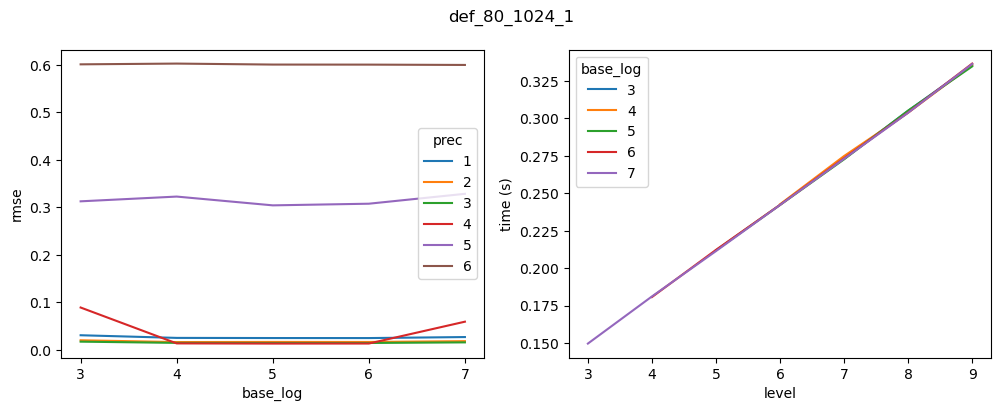

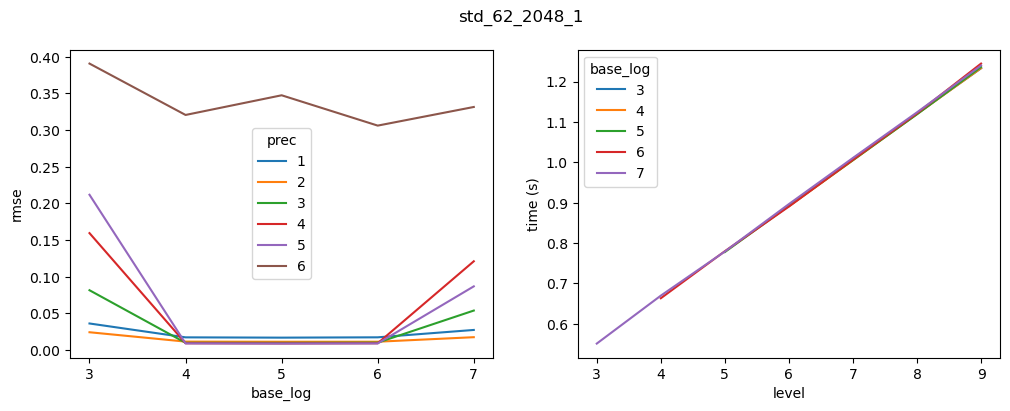

In [22]:
df = df_boot2
th = 10

for key in key_order[1:]:
    idx = (df.key == key)&(df.base_log+df.level>=th)
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    df[idx].pivot_table(values="error", index=["prec"], 
        columns=["base_log"], aggfunc=rmse).T.plot(ax=axs[0], xticks=df.base_log.unique())
    axs[0].set_ylabel("rmse")
    df[idx].pivot_table(values="exc_time", index=["level"], 
        columns=["base_log"], aggfunc="mean").plot(ax=axs[1], xticks=df.level.unique())
    axs[1].set_ylabel("time (s)")
    plt.suptitle(key)
    plt.show()


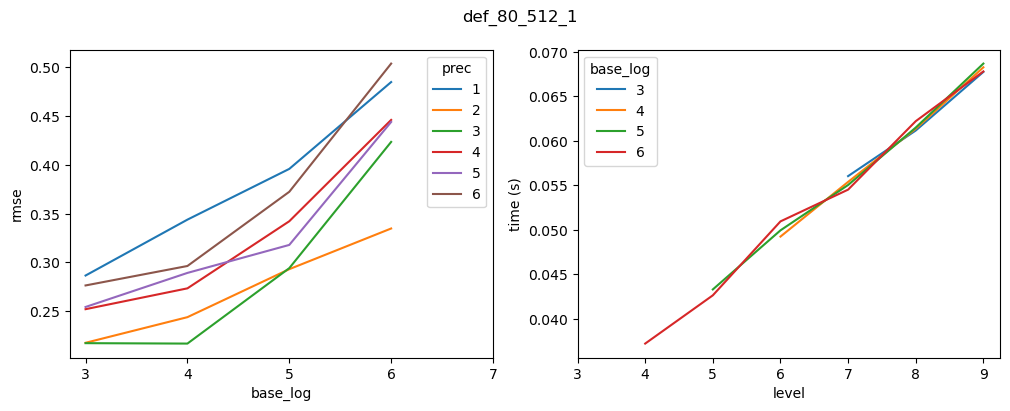

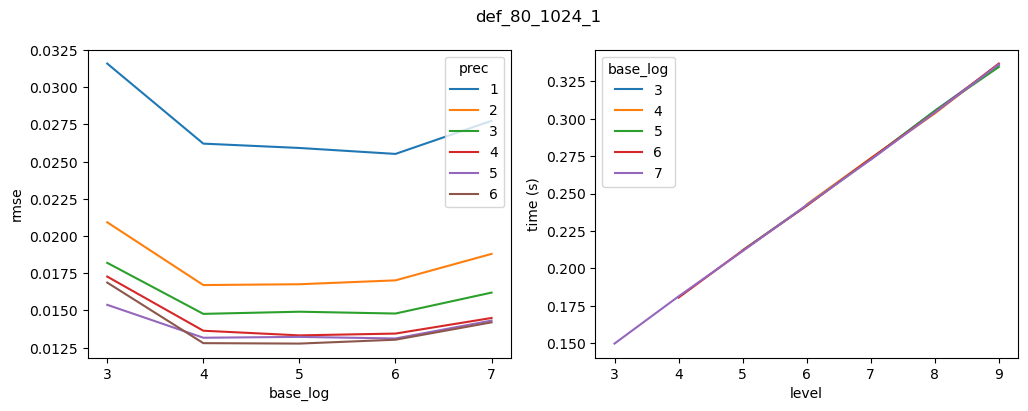

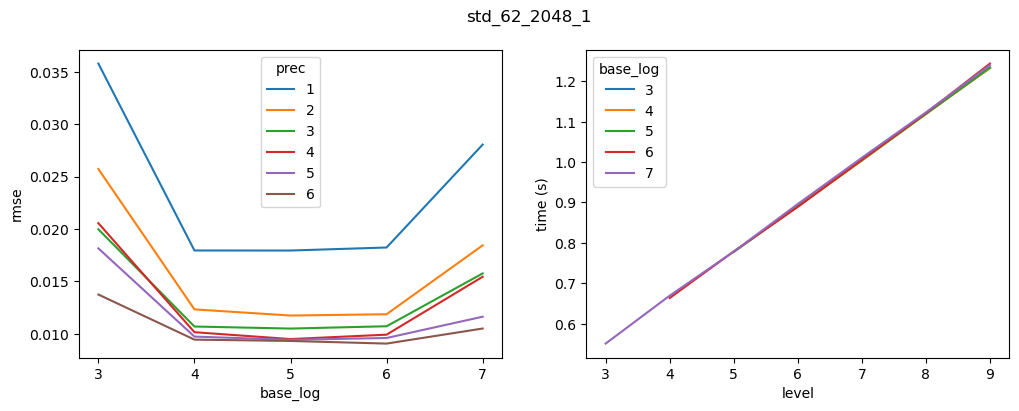

In [23]:
df = df_boot2
th = 10
lim = 0.5

for key in key_order[1:]:
    idx = (df.key == key)&(df.value>=-lim)&(df.value<=lim)&(df.base_log+df.level>=th)
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    df[idx].pivot_table(values="error", index=["prec"], 
        columns=["base_log"], aggfunc=rmse).T.plot(ax=axs[0], xticks=df.base_log.unique())
    axs[0].set_ylabel("rmse")
    df[idx].pivot_table(values="exc_time", index=["level"], 
        columns=["base_log"], aggfunc="mean").plot(ax=axs[1], xticks=df.level.unique())
    axs[1].set_ylabel("time (s)")
    plt.suptitle(key)
    plt.show()


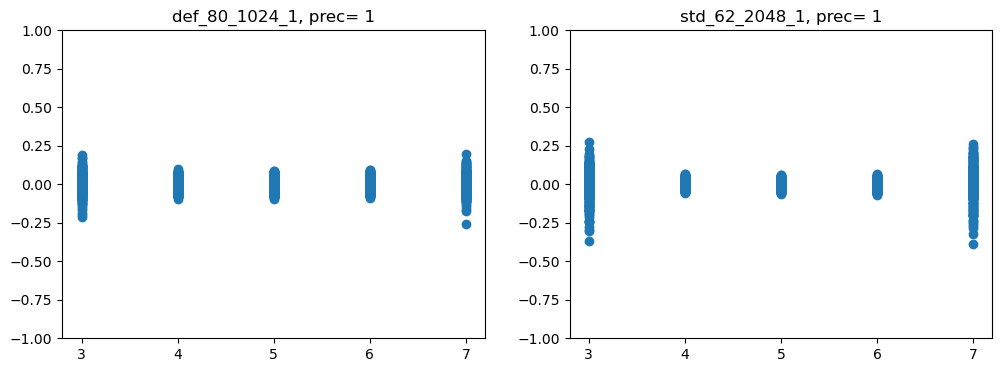

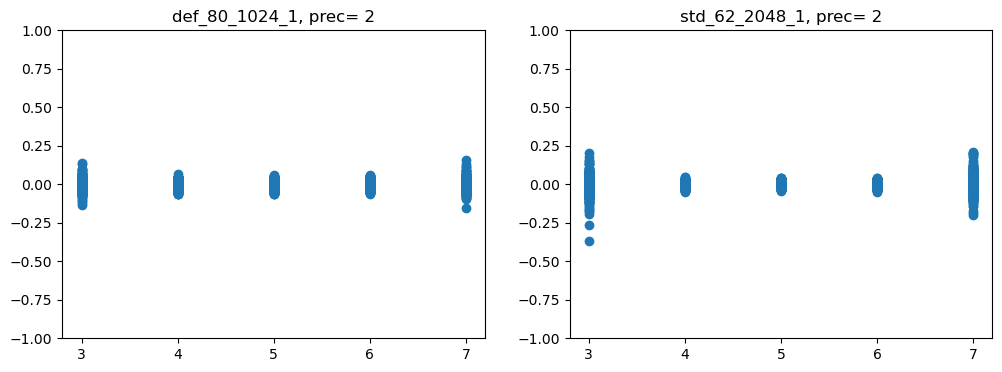

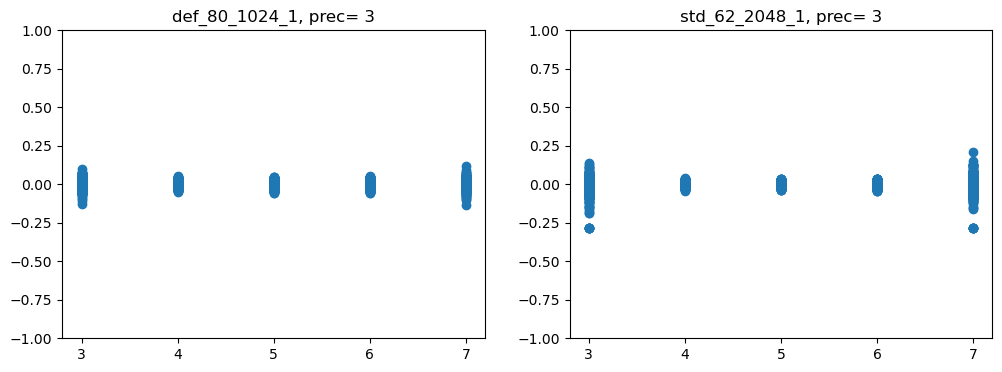

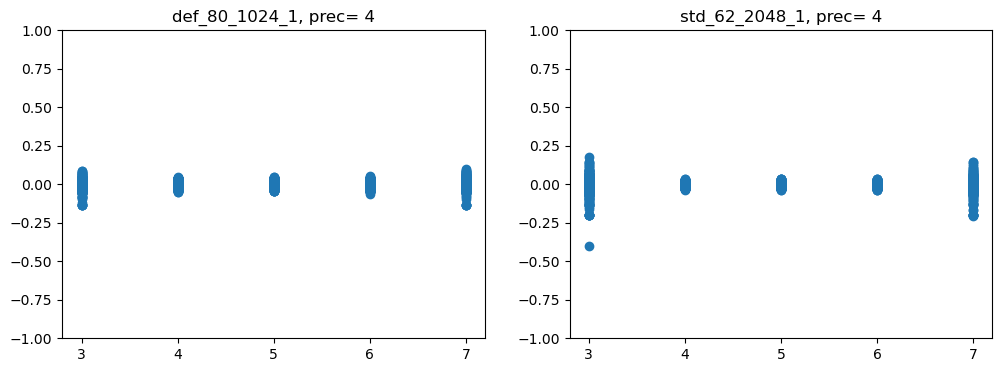

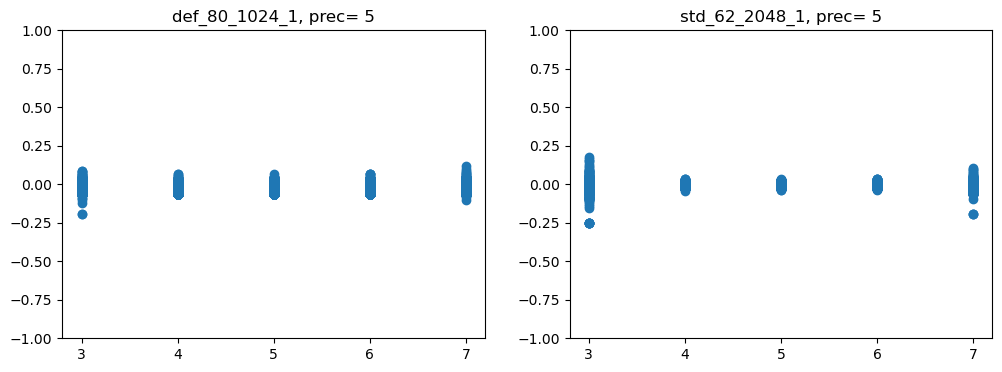

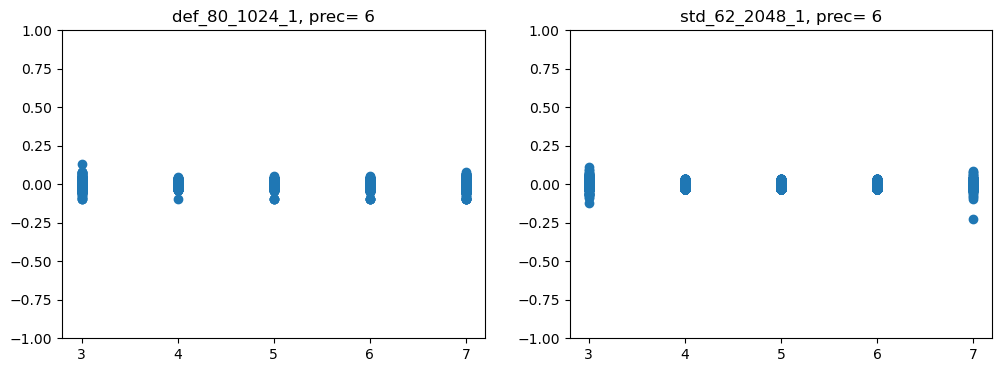

In [24]:
df = df_boot2
th = 10

for j in range(1,7):
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    for i, key in enumerate(key_order[2:]):
        idx = (df.key == key)&(df.prec==j)&(df.base_log+df.level>=th)
        axs[i].scatter(df.loc[idx,"base_log"],df.loc[idx,"error"])
        axs[i].set_title(f"{key}, prec= {j}")
        axs[i].set_ylim([-1,1])
        axs[i].set_xticks(df.base_log.unique())
    plt.show()


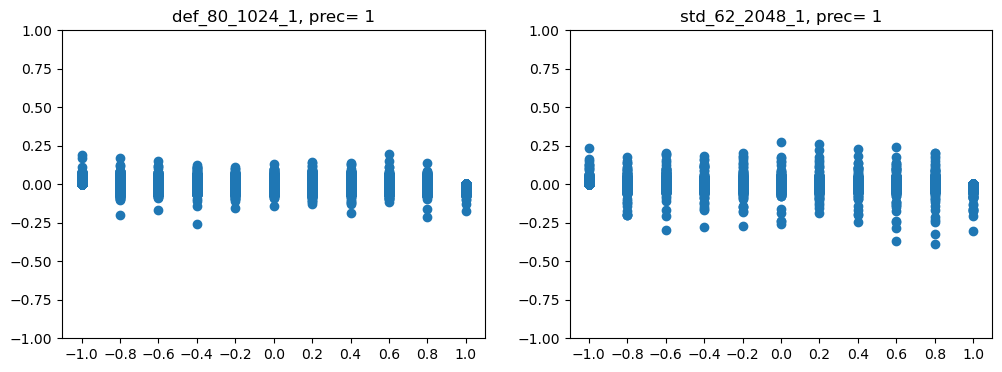

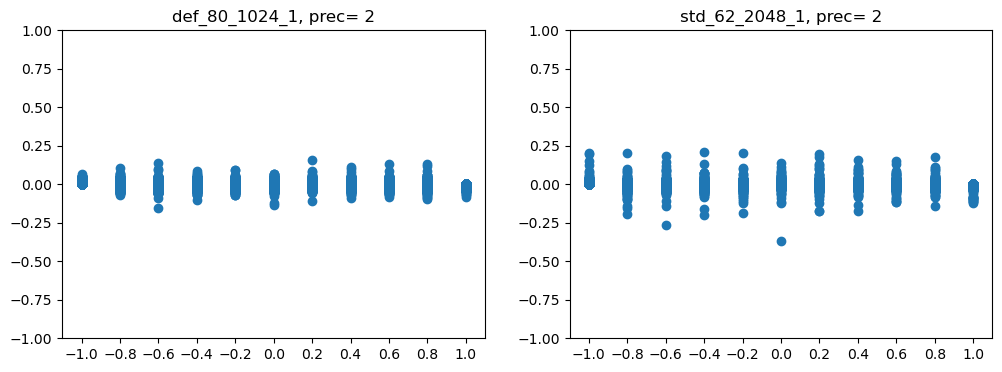

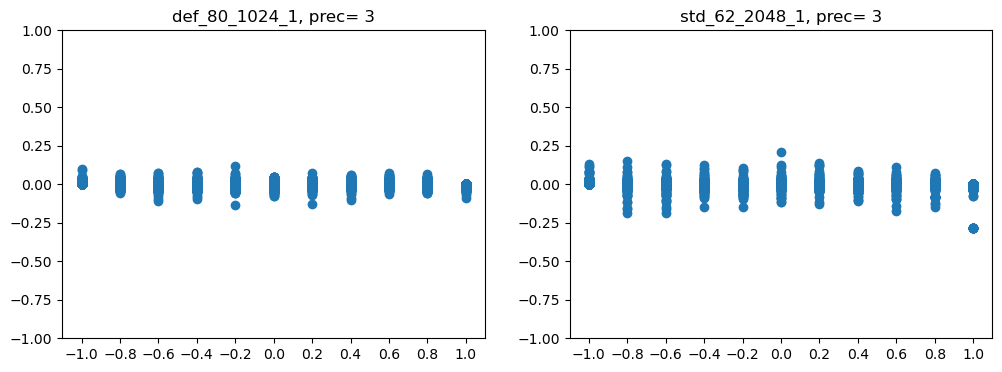

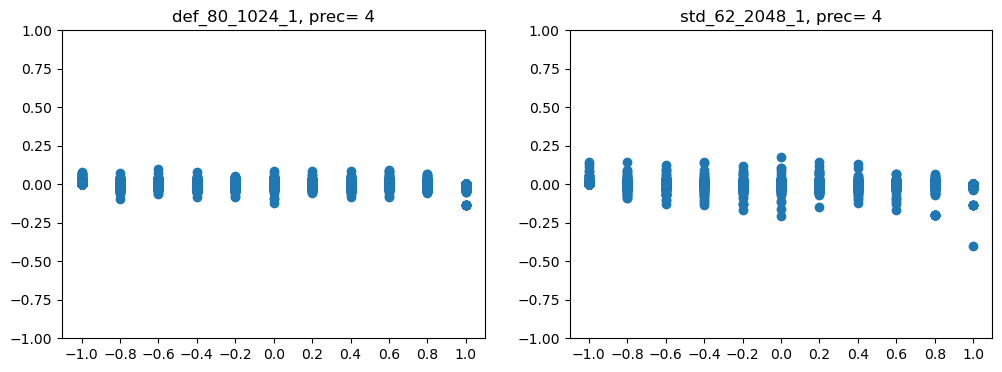

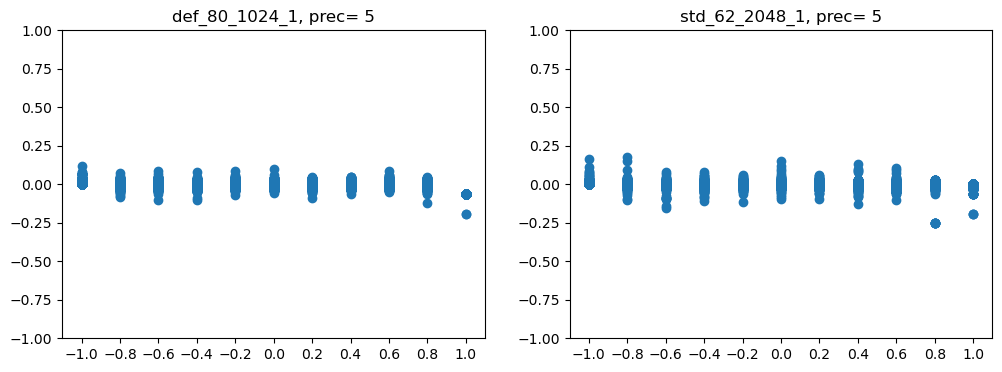

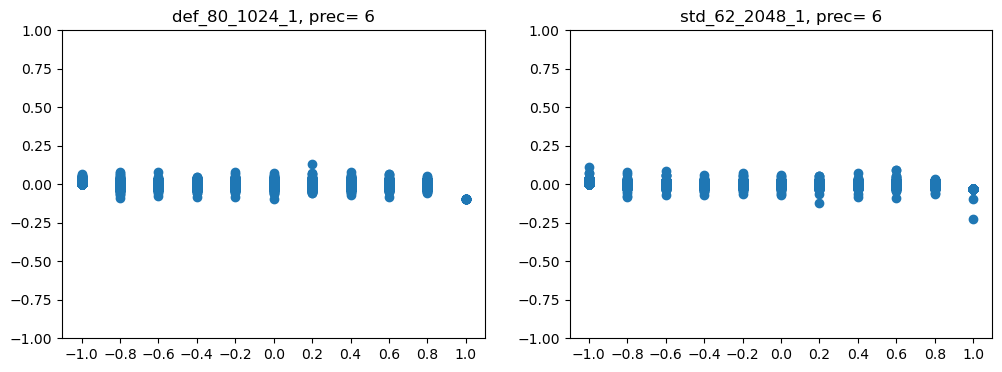

In [25]:
df = df_boot2
th = 10

for j in range(1,7):
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    for i, key in enumerate(key_order[2:]):
        idx = (df.key == key)&(df.prec==j)&(df.base_log+df.level>=th)
        axs[i].scatter(df.loc[idx,"value"],df.loc[idx,"error"])
        axs[i].set_title(f"{key}, prec= {j}")
        axs[i].set_ylim([-1,1])
        axs[i].set_xticks(df.value.unique())
    plt.show()
